<a href="https://colab.research.google.com/github/davidofitaly/notes_03_python_in_data_analysis/blob/main/06_graphs_and_data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

## 6.1 Basic operation of the matplotlib package interface

###basic chart

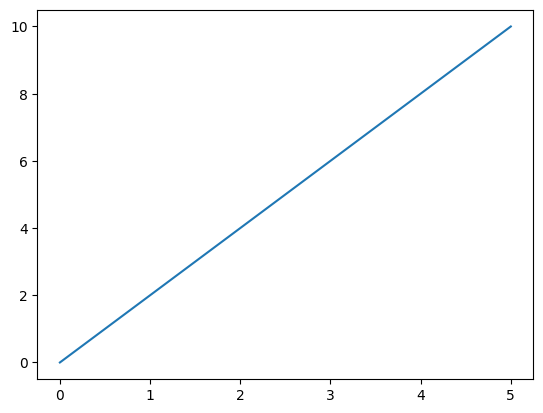

In [ ]:
# Create an array of values from 0 to 10 (step of 2)
data_1 = np.arange(0, 12, 2)

# Plot the data as a line chart
plt.plot(data_1)

###figure objects and component charts

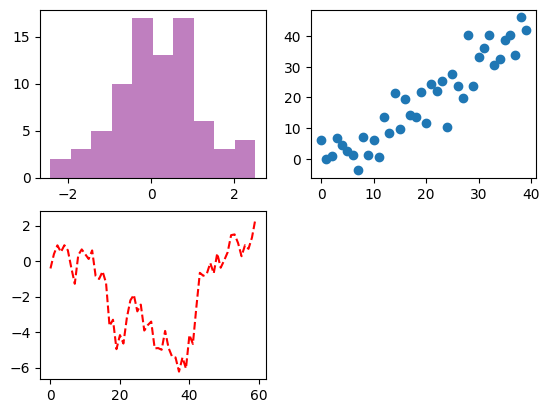

In [ ]:
# Create a figure
fig = plt.figure()

# Add subplots in a 2x2 grid (only three subplots are used)
ax_1 = fig.add_subplot(2, 2, 1)  # First subplot (top-left)
ax_2 = fig.add_subplot(2, 2, 2)  # Second subplot (top-right)
ax_3 = fig.add_subplot(2, 2, 3)  # Third subplot (bottom-left)

# Plot a histogram with 80 random standard normal values
ax_1.hist(np.random.standard_normal(80), bins=10, color='purple', alpha=0.5)

# Create a scatter plot with x values from 0 to 39 and y values with added noise
ax_2.scatter(np.arange(40), np.arange(40) + 5 * np.random.standard_normal(40))

# Plot a cumulative sum of 60 random standard normal values as a dashed red line
ax_3.plot(np.random.standard_normal(60).cumsum(), color='red', linestyle='dashed');

###modification of the margins of the component diagrams

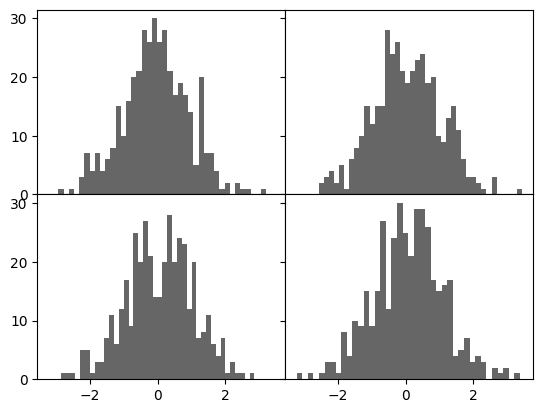

In [ ]:
# Create a figure with a 2x2 grid of subplots, sharing x and y axes
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

# Loop through the subplot grid and plot a histogram in each
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(400), bins=40, color='black', alpha=0.6)

# Adjust spacing between subplots to remove gaps
fig.subplots_adjust(wspace=0, hspace=0)


####colours, markings and line styles

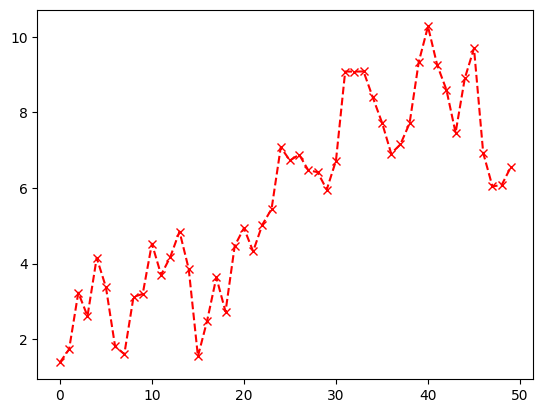

In [ ]:
plt.plot(np.random.standard_normal(50).cumsum(), color='red', linestyle='dashed', marker='x');

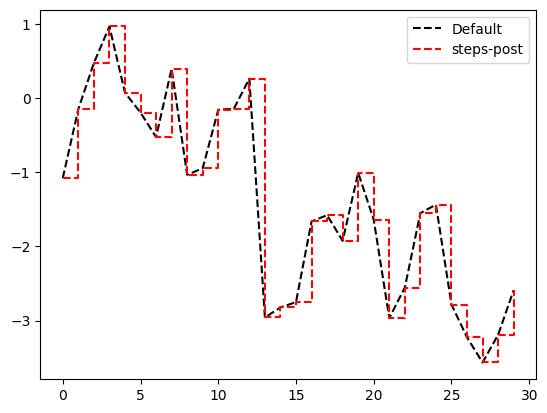

In [ ]:
# Generate cumulative sum of 30 random standard normal values
data = np.random.standard_normal(30).cumsum()

# Plot a dashed black line (default drawing style)
plt.plot(data, color='black', linestyle='dashed', label='Default')

# Plot the same data with 'steps-post' drawing style in red
plt.plot(data, color='red', linestyle='dashed', drawstyle='steps-post', label='steps-post')

# Add a legend to distinguish the plots
plt.legend();

###points, labels and legends

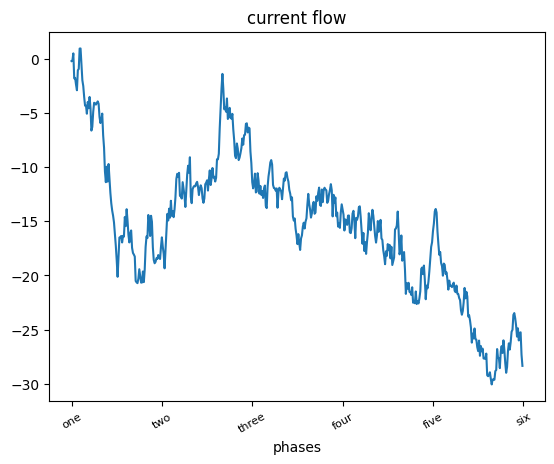

In [ ]:
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(500).cumsum())

ticks =  ax.set_xticks([0, 100, 200, 300, 400, 500])

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five', 'six'], rotation=30, fontsize=8)

ax.set_xlabel('phases')
ax.set_title('current flow');

###adding a legend

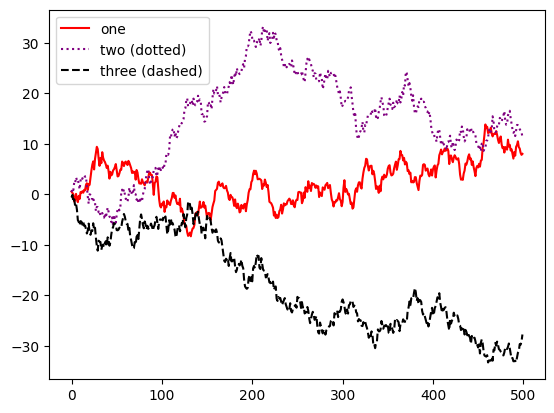

In [156]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot three cumulative sum lines with unique labels
ax.plot(np.random.randn(500).cumsum(), color='red', label='one')
ax.plot(np.random.randn(500).cumsum(), color='purple', label='two (dotted)', linestyle='dotted')
ax.plot(np.random.randn(500).cumsum(), color='black', label='three (dashed)', linestyle='dashed')

# Add a legend
ax.legend()

###recording of graphs

In [ ]:
# Save the figure as a PDF file
fig.savefig('figpath.pdf', dpi=300, bbox_inches='tight')

In [ ]:
# Save the figure as a png
fig.savefig('figpath.png')

##6.2 Generation of graphs using the pandas and seaborn packages

###line graphs

<Axes: >

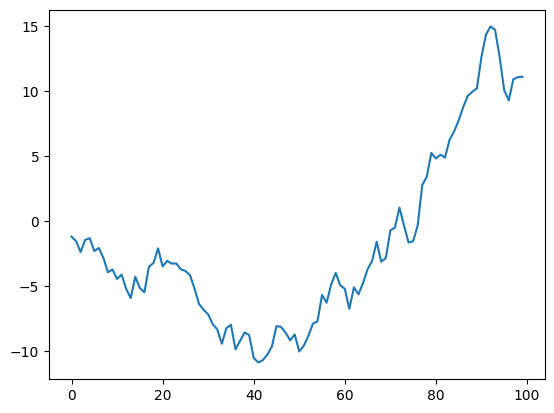

In [38]:
# Create a pandas Series with 100 random values from a standard normal distribution
data_1 = pd.Series(
    np.random.randn(100).cumsum(),  # Compute cumulative sum to create a random walk effect
    index=np.arange(0, 100)  # Set index from 0 to 99
)

# Plot the Series as a line chart
data_1.plot()


<Axes: >

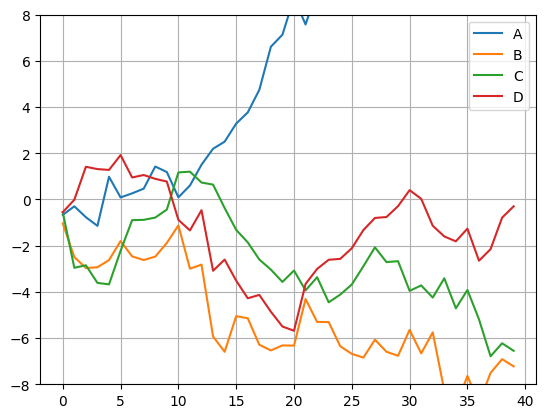

In [37]:
# Create a DataFrame with 40 rows and 4 columns filled with random numbers from a standard normal distribution
data_2 = pd.DataFrame(
    np.random.standard_normal((40, 4)).cumsum(0),  # Compute cumulative sum along rows (axis 0)
    columns=['A', 'B', 'C', 'D'],  # Set column names
    index=np.arange(0, 40)  # Set index from 0 to 39
)

# Plot the DataFrame with a grid and a y-axis limit from -8 to 8
data_2.plot(grid=True, ylim=[-8, 8])

###bar graphs



*   


1    0.668891
2    0.720600
3    0.691237
4    0.913017
5    0.894376
6    0.382797
dtype: float64


<Axes: >

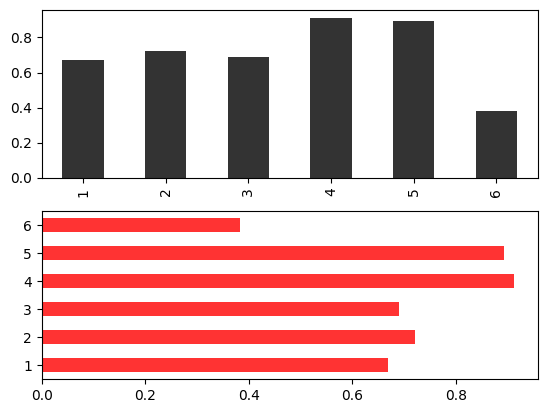

In [65]:
# Create two plots in one figure (2 rows, 1 column)
fig, axes = plt.subplots(2, 1)

# Generate data (6 random numbers from the range [0, 1])
data_3 = pd.Series(np.random.uniform(low=0.0, high=1.0, size=6), index=np.arange(1, 7))

# Display data
print(data_3)

# Create a vertical bar plot in the first subplot (axes[0]), with black color and alpha transparency of 0.8
data_3.plot.bar(ax=axes[0], color='black', alpha=0.8)

# Create a horizontal bar plot in the second subplot (axes[1]), with red color and alpha transparency of 0.8
data_3.plot.barh(ax=axes[1], color='red', alpha=0.8)



*   


              A         B         C         D
one    0.376533  0.965530  0.564537  0.556573
two    0.473706  0.341860  0.345681  0.622243
three  0.607931  0.819176  0.476250  0.877334
four   0.122816  0.324241  0.687087  0.637621
five   0.469569  0.943646  0.071895  0.915415
six    0.036350  0.067285  0.703231  0.693018
seven  0.737091  0.930181  0.753441  0.561812
eight  0.312637  0.715508  0.615754  0.621351


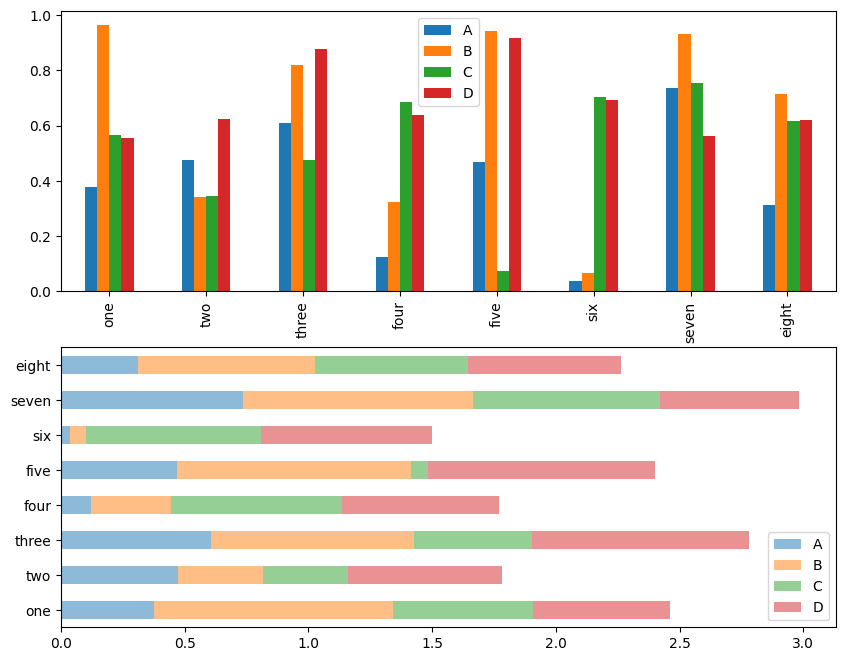

In [92]:
data_4 = pd.DataFrame(np.random.rand(8,4),
                      index = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight'],
                      columns = ['A', 'B', 'C', 'D'])

print(data_4)

fig, axes = plt.subplots(2, 1, figsize=(10,8))

data_4.plot.bar(ax=axes[0]);
data_4.plot.barh(ax=axes[1],stacked=True, alpha=0.5);



*   


0    5
1    1
2    2
3    1
4    1
5    1
6    4
7    3
8    3
9    5
dtype: int64


<Axes: >

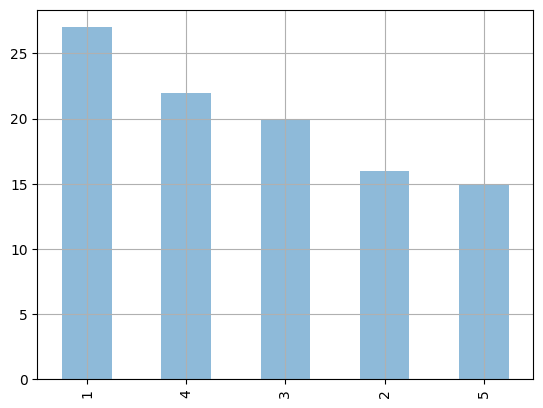

In [107]:
# Creating a Series 'data_5' with 100 random integers in the range 1 to 5
data_5 = pd.Series(np.random.randint(low=1, high=6, size=100))

# Displaying the first 10 elements of the 'data_5' series
print(data_5[:10])

# Counting the occurrences of each number in 'data_5' and plotting a bar chart
# value_counts() counts the unique values, and 'ascending=False' sorts them in descending order
# alpha=0.5 sets the transparency of the bars, and grid=True adds a grid to the chart
data_5.value_counts(ascending=False).plot.bar(alpha=0.5, grid=True)



*   



In [116]:
# Loading the "Tips" dataset from seaborn
tips = sns.load_dataset('tips')

# Displaying the first 5 rows of the dataset
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [127]:
# Creating a cross-tabulation of 'day' and 'size' from the 'tips' dataset, counting occurrences of each combination
party = pd.crosstab(tips['day'], tips['size'])

# Reordering the index of the 'party' DataFrame to display days in the order: 'Thur', 'Fri', 'Sat', 'Sun'
party = party.reindex(index=['Thur', 'Fri', 'Sat', 'Sun'])

# Selecting columns for group sizes between 2 and 5 (inclusive)
party = party.loc[:, 2:5]

# Displaying the final result
party

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [134]:
# Dividing each element in the 'party' DataFrame by the sum of its respective row (axis='columns')
# This normalizes the values to show the proportion of each party size relative to the total for that day
party_pcts = party.div(party.sum(axis='columns'), axis='index')

# Displaying the normalized 'party' DataFrame
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


(0.0, 1.0)

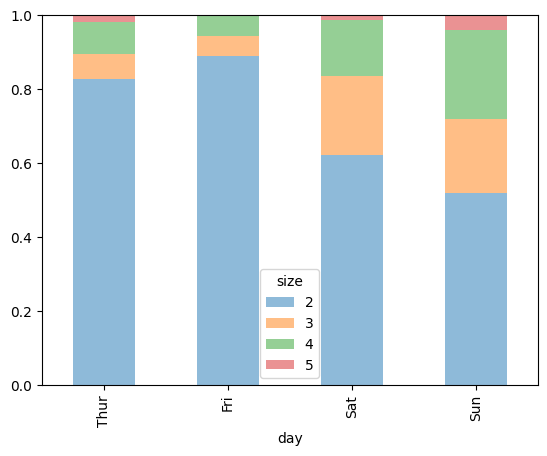

In [136]:
# Create a stacked bar plot with 50% transparency (alpha=0.5)
party_pcts.plot.bar(stacked=True, alpha=0.5)

# Set the y-axis range from 0 to 1, which is useful when the data is normalized and should fall within this range
plt.ylim(0, 1)



*  


In [149]:
# Creating a new column 'tips_proc' in the 'tips' DataFrame by calculating the proportion of the tip
# It is calculated as the tip amount divided by the total bill minus the tip amount
tips['tips_proc'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Displaying the first few rows of the updated DataFrame to check the new column
tips.head()


,total_bill,tip,sex,smoker,day,time,size,tips_proc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tips_proc', ylabel='day'>

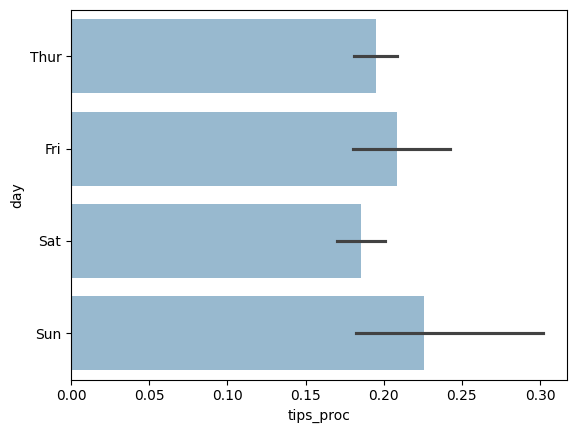

In [150]:
# Creating a horizontal bar plot using seaborn (sns) with 'tips_proc' on the x-axis and 'day' on the y-axis
# The 'orient="h"' argument specifies that the bars should be horizontal
# The 'alpha=0.5' sets the transparency of the bars to 50%
sns.barplot(x='tips_proc', y='day', data=tips, orient='h', alpha=0.5)

<Axes: xlabel='tips_proc', ylabel='day'>

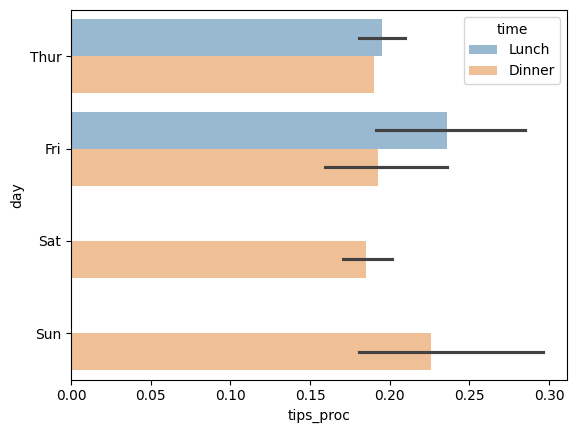

In [155]:
# Creating a horizontal bar plot with the 'tips_proc' on the x-axis and 'day' on the y-axis
# The 'orient="h"' argument specifies horizontal bars
# 'alpha=0.5' sets the transparency of the bars to 50%
# 'hue="time"' adds color coding to differentiate between lunch and dinner times
sns.barplot(x='tips_proc', y='day', data=tips, orient='h', alpha=0.5, hue='time')


###histograms and density plots

<Axes: ylabel='Frequency'>

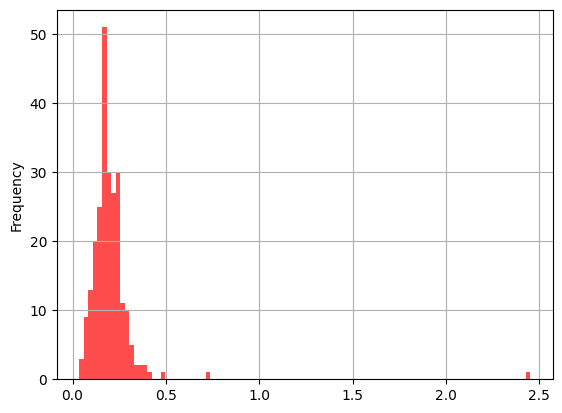

In [162]:
# Creating a histogram for the 'tips_proc' column with 100 bins
# 'grid=True' adds a grid to the plot for better readability
# 'alpha=0.7' sets the transparency of the bars to 70%
# 'color="red"' colors the histogram bars in red
tips['tips_proc'].plot.hist(bins=100, grid=True, alpha=0.7, color='red')

<Axes: ylabel='Density'>

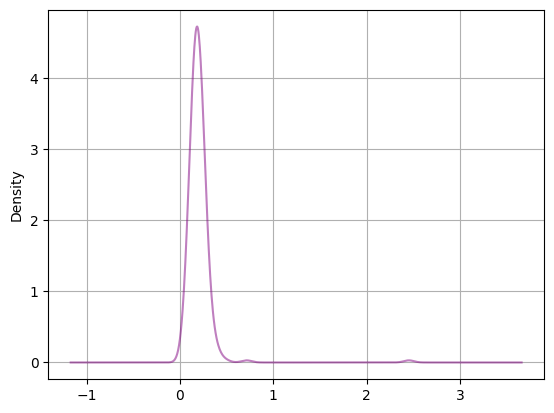

In [167]:
# Creating a density plot (kernel density estimate) for the 'tips_proc' column
# 'grid=True' adds a grid to the plot for better readability
# 'alpha=0.5' sets the transparency of the plot line to 50%
# 'color="purple"' sets the color of the density curve to purple
tips['tips_proc'].plot.density(grid=True, alpha=0.5, color='purple')



*   



<ipython-input-176-8d9da12b5956>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, bins=100, color='red')


<Axes: ylabel='Density'>

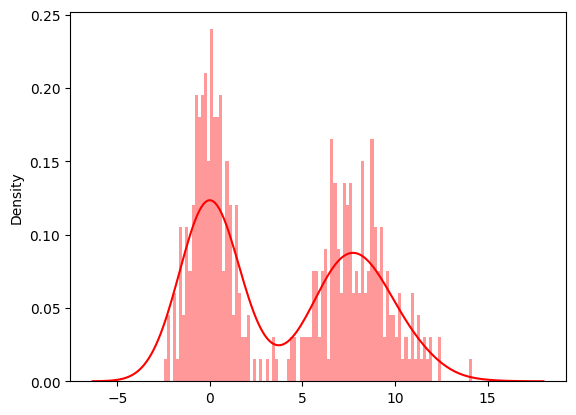

In [176]:
# Generating 200 random values from a standard normal distribution (mean=0, std=1)
data_ex_1 = np.random.standard_normal(200)

# Generating another 200 random values from a standard normal distribution and scaling them (mean=8, std=2)
data_ex_2 = 8 + 2 * np.random.standard_normal(200)

# Concatenating both datasets (data_ex_1 and data_ex_2) into one Series
df = pd.Series(np.concatenate([data_ex_1, data_ex_2]))

# Creating a histogram with 100 bins for the concatenated data in df
# The bars are colored red
sns.distplot(df, bins=100, color='red')




*   



<Axes: xlabel='total_bill', ylabel='tip'>

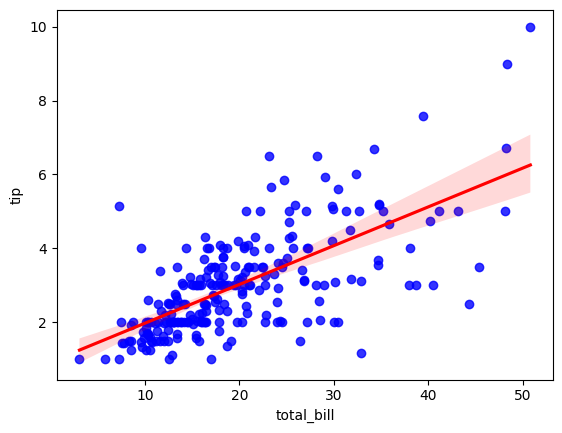

In [180]:
# Create a regression plot showing the relationship between total_bill and tip
sns.regplot(x='total_bill', y='tip', data=tips, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})


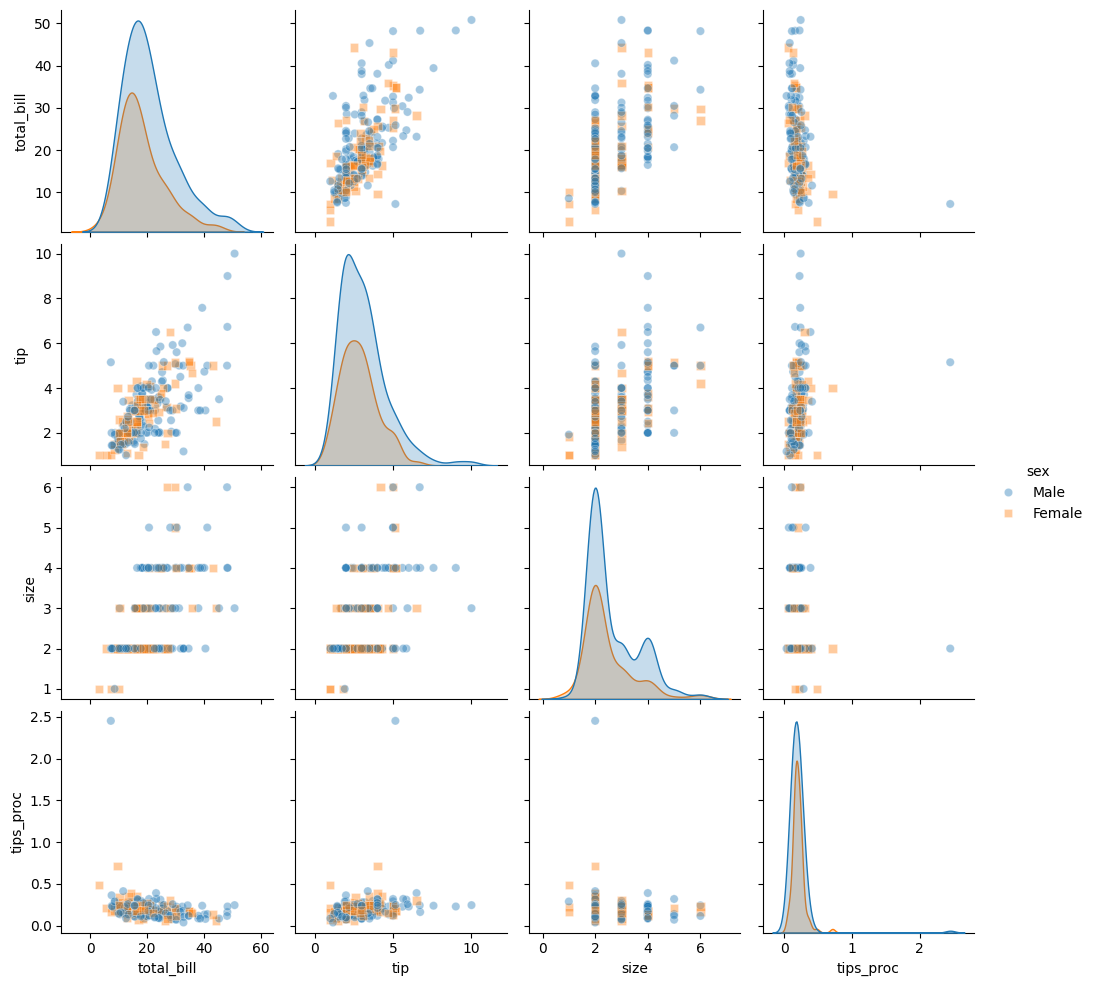

In [182]:
# Create a pairplot to show relationships between multiple variables in the dataset
sns.pairplot(tips, hue='sex', diag_kind='kde', markers=["o", "s"], plot_kws={'alpha': 0.4})
